In [15]:
from sklearn import linear_model
import pandas as p
import numpy as np

In [16]:
df=p.read_excel("file.xlsx")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [17]:
reg=linear_model.LinearRegression()


In [18]:
model=reg.fit(df[['year']],df["per capita income (US$)"])


In [19]:

model.predict(np.array([2020]).reshape(-1,1))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [20]:
model.coef_

array([828.46507522])

In [21]:
model.intercept_

-1632210.7578554575

In [22]:
2020*828.46507522-1632210.7578554575

41288.694088942604

In [24]:
df1=p.read_excel("newfile.xlsx")
df1

,2021
0,2022
1,2023
2,2024
3,2025
4,2026
5,2027
6,2028
7,2029
8,2030


In [25]:
w=model.predict(df1)
w

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42945.62424486, 43774.08932009, 44602.55439531, 45431.01947053,
       46259.48454575, 47087.94962098, 47916.4146962 , 48744.87977142,
       49573.34484664])

In [26]:
df1["per_capita"]=w
df1

,2021,per_capita
0,2022,42945.624245
1,2023,43774.089320
2,2024,44602.554395
3,2025,45431.019471
4,2026,46259.484546
5,2027,47087.949621
6,2028,47916.414696
7,2029,48744.879771
8,2030,49573.344847


In [34]:
df1.to_excel("newfile.xlsx","Sheet1",index=False)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

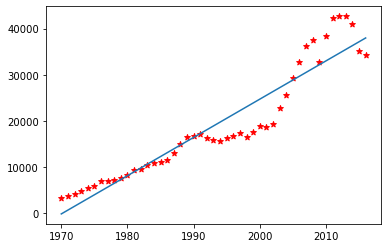

In [42]:
plt.scatter(df.year,df['per capita income (US$)'],color='red',marker='*')
plt.plot(df.year,model.predict(df[["year"]]))

In [66]:
df=p.read_excel("file.xlsx")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [67]:
median=df['test_score(out of 10)'].median()
df['test_score(out of 10)'].fillna(median,inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [69]:
from word2number import w2n
df.experience=df.experience.fillna("zero")
df
df.experience=df.experience.apply(w2n.word_to_num)
df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [72]:
obj=linear_model.LinearRegression()
obj.fit( df[['experience',"test_score(out of 10)","interview_score(out of 10)"] ]  ,  df["salary($)"])

LinearRegression()

In [73]:
obj.predict([[2,9,6]])

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [76]:
obj.coef_


array([2812.95487627, 1845.70596798, 2205.24017467])

In [77]:
obj.intercept_

17737.26346433771

In [78]:
2812.95487627*2+1845.70596798*9+2205.24017467*6+17737.26346433771

53205.967976717715